Enter your mail: anya.antipina@gmail.com.  

{'mail': 'anya.antipina@gmail.com',  

 'id': 1395113663,  

 'type': 'regression',  

 'dataset': {'name': 'Diabetes Data Set',  

  'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'},  
   
  'method': ['Линейная регрессия', 'SVR']}.

In [2]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка данных

In [111]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [142]:
dataset = load_diabetes()
X = dataset.data
Y = dataset.target
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.3)
X = np.vstack((X_train, X_test))
Y = np.hstack((Y_train, Y_test))
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

f = dataset.feature_names
columns_names = [*f, "Y"]
full_data = np.vstack((X.transpose(), Y)).transpose()
pandas.DataFrame(full_data, columns=columns_names).sample(5, random_state=0)
# Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

X shape: (442, 10)
Y shape: (442,)
X_train shape: (309, 10)
X_test shape: (133, 10)


age      sex       bmi        bp        s1        s2        s3  \
362  0.045341  0.05068 -0.008362 -0.033214 -0.007073  0.001191 -0.039719   
249 -0.001882  0.05068  0.071397  0.097616  0.087868  0.075407 -0.021311   
271 -0.009147  0.05068 -0.027762  0.008101  0.047965  0.037203 -0.028674   
435  0.016281  0.05068  0.014272  0.001215  0.001183 -0.021355 -0.032356   
400  0.027178  0.05068 -0.035307  0.032201 -0.011201  0.001504 -0.010266   

           s4        s5        s6      Y  
362  0.034309  0.029936  0.027917  131.0  
249  0.071210  0.071424  0.023775  252.0  
271  0.034309  0.066048 -0.042499  209.0  
435  0.034309  0.074968  0.040343  220.0  
400 -0.002592 -0.014956 -0.050783   53.0

In [143]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lr = lin_reg.fit(X_train, Y_train)

print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, Y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, Y_test)))

Правильность на обучающем наборе: 0.55
Правильность на тестовом наборе: 0.39


## Нормировка данных

In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X = np.vstack((X_train, X_test))
Y = np.hstack((Y_train, Y_test))

full_data = np.vstack((X.transpose(), Y)).transpose()
pandas.DataFrame(full_data, columns=columns_names).sample(5, random_state=0)

age       sex       bmi        bp        s1        s2        s3  \
362  0.952962  1.042995 -0.146270 -0.694419 -0.145209  0.034892 -0.834371   
249 -0.024828  1.042995  1.505394  2.050066  1.858677  1.594398 -0.452584   
271 -0.175257  1.042995 -0.548027  0.172261  1.016464  0.791614 -0.605299   
435  0.351245  1.042995  0.322445  0.027814  0.029042 -0.438882 -0.681657   
400  0.576889  1.042995 -0.704265  0.677824 -0.232335  0.041472 -0.223512   

           s4        s5        s6      Y  
362  0.695263  0.626986  0.562345  131.0  
249  1.449736  1.472075  0.481184  252.0  
271  0.695263  1.362573 -0.817383  209.0  
435  0.695263  1.544270  0.805826  220.0  
400 -0.059210 -0.287435 -0.979704   53.0

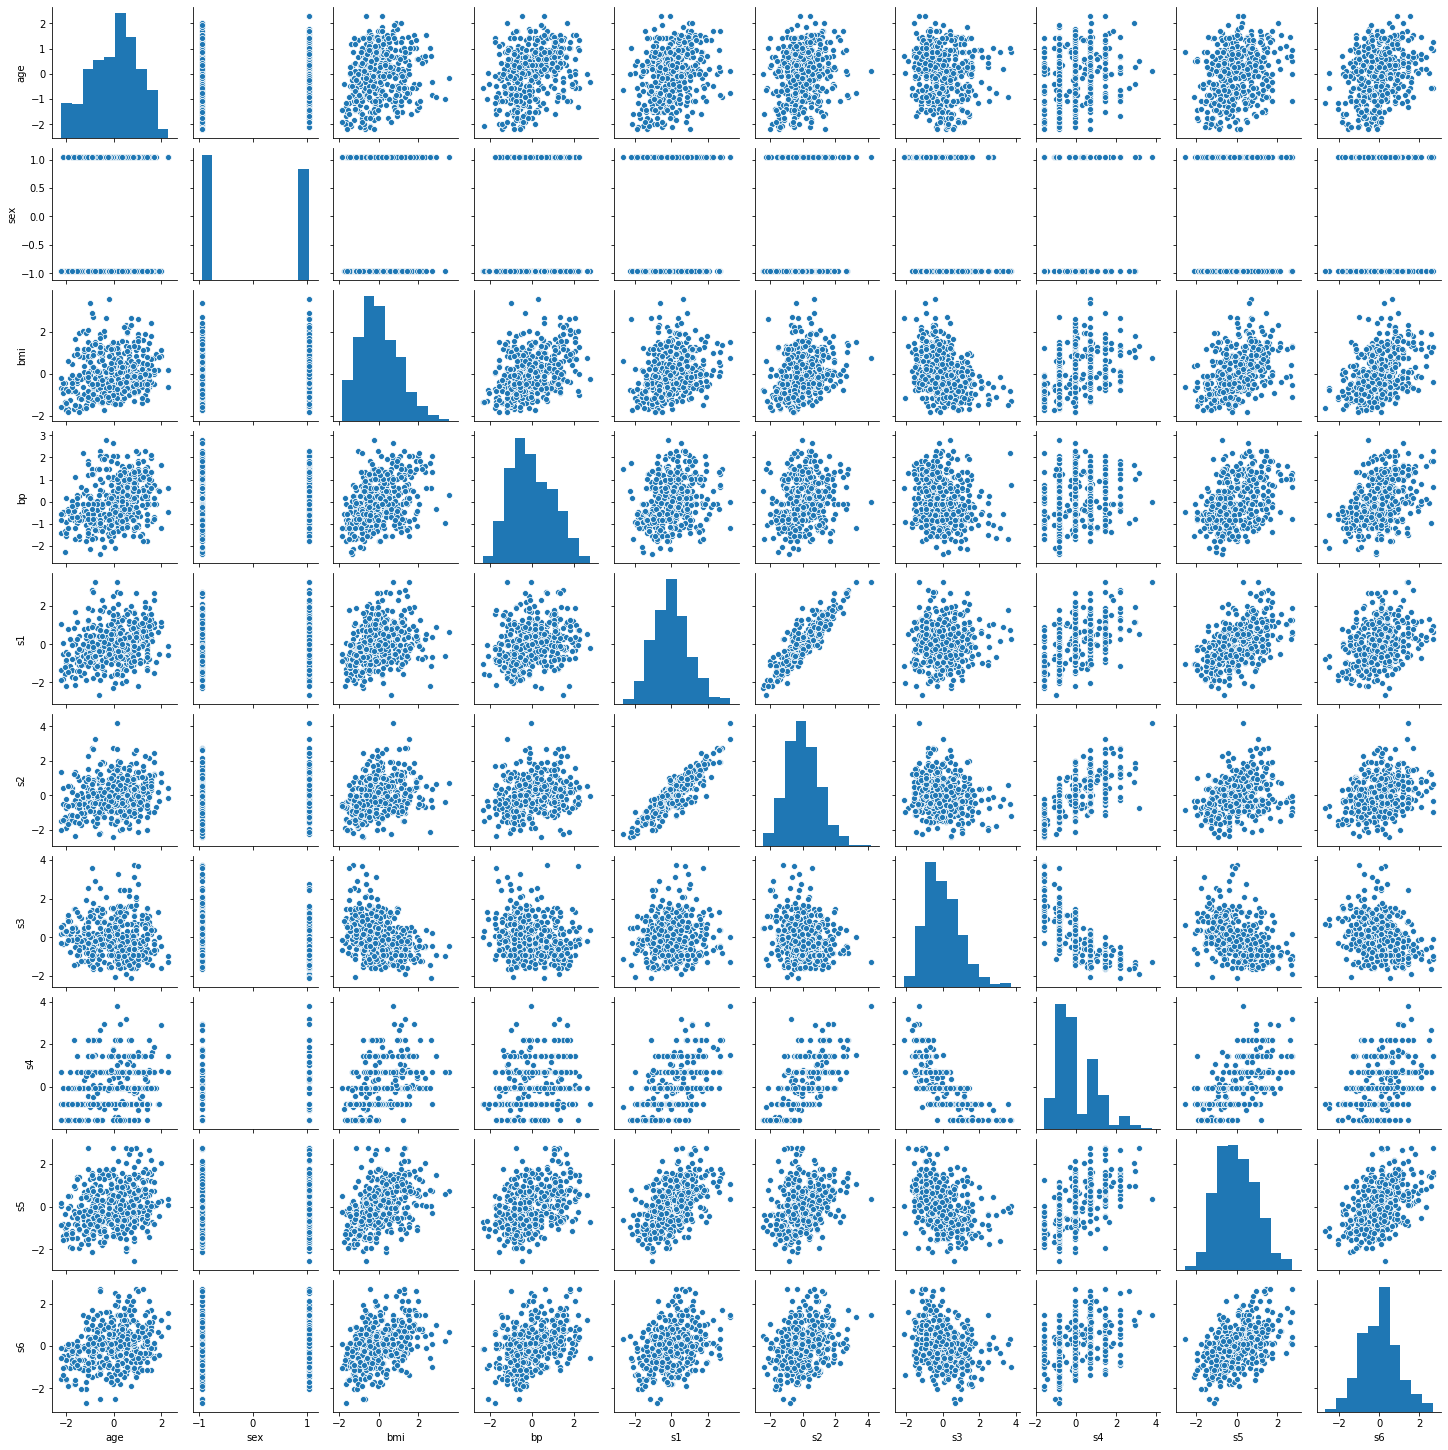

In [41]:
sns.pairplot(pandas.DataFrame(X, columns=dataset.feature_names), height=2)
plt.show()

## Линейная регрессия

In [145]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, Y_train)
print("lin_reg.coef_: {}".format(lin_reg.coef_))
print("lin_reg.intercept_: {}".format(lin_reg.intercept_))
print("Правильность на обучающем наборе: {:.2f}".format(lin_reg.score(X_train, Y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lin_reg.score(X_test, Y_test)))


lin_reg.coef_: [ -2.53406903  -9.21472139  27.98294725  12.98831199 -23.9129686
  11.5016562   -3.36239068   4.23657382  35.44334754   1.36668693]
lin_reg.intercept_: 152.11974110032364
Правильность на обучающем наборе: 0.55
Правильность на тестовом наборе: 0.39


### Промежуточный вывод
Можно видеть, что правильность даже на обучающем наборе очень низкая. Значит, случилось переобучение и сама модель не очень подходит для данного набора данных.  
Тогда возьмем модель, в которой используется регуляризация, и попробуем поварьировать параметром alpha.  

In [146]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, Y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, Y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, Y_test)))

ridge100 = Ridge(alpha=50)
ridge100.fit(X_train, Y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge100.score(X_train, Y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(ridge100.score(X_test, Y_test)))

ridge500 = Ridge(alpha=0.001)
ridge500.fit(X_train, Y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge500.score(X_train, Y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(ridge500.score(X_test, Y_test)))

print(ridge.coef_) 
print(ridge100.coef_) 
print(ridge500.coef_)

Правильность на обучающем наборе: 0.55
Правильность на тестовом наборе: 0.39
Правильность на обучающем наборе: 0.55
Правильность на тестовом наборе: 0.40
Правильность на обучающем наборе: 0.55
Правильность на тестовом наборе: 0.39
[ -2.48236976  -9.15678237  27.9767585   12.91640186 -17.89075263
   6.74710387  -6.04548561   3.46840137  33.02576323   1.43335968]
[ -1.55039996  -7.66561337  24.801928    12.23212541  -2.04103082
  -4.94962944 -10.64359866   4.73469992  22.61489854   3.07503091]
[ -2.53400603  -9.2146534   27.98296494  12.98821526 -23.90476907
  11.49519704  -3.36609269   4.23545143  35.44010816   1.36676271]


In [153]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, Y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, Y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(lasso.score(X_test, Y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

lasso = Lasso(alpha=0.05, max_iter=10000)
lasso.fit(X_train, Y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, Y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(lasso.score(X_test, Y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.55
Правильность на контрольном наборе: 0.39
Количество использованных признаков: 8
Правильность на обучающем наборе: 0.47
Правильность на контрольном наборе: 0.34
Количество использованных признаков: 4
